# Identify Characteristic Values for the moving coil

A coil in general and the moving coil of this loudspeaker are modelled by a series connection of resistor and coil. In order to identify the resistance $R_L$ and inductance $L$, the power on behavior  is measured with an oscilloscope.

![RL Circuit](PowerOnRLCircuitWhite.png)

Oscilloscopes are able to measure voltages, however for current measurement a shunt resistor must be applied. If both voltages $U_{RL}$ and $U_I$ must be measured, a common ground is required.

After loading the required libraries, measured data is saved as pandas dataframe and the values are displayed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read and display data
signal = pd.read_csv('scope_0.csv', header=1)
signal.head()

,second,Volt,Volt.1
0,0.000136,7.619347,-0.003769
1,0.000137,7.437186,-0.040201
2,0.000137,7.638191,-0.023869
3,0.000138,7.437186,-0.013819
4,0.000138,7.619347,0.000000


The column 'second' shows very small values. In order to achieve a column 'time / ms' the column is renamed and multiplied with a factor of 1000. Even the other columns are renamed according to the experiment content.

In [2]:
# Format data 
signal['time / ms'] = signal['second']*1000
signal = signal.rename(columns={'Volt': 'u_rl', 'Volt.1': 'u_i'})
signal.head()

,second,u_rl,u_i,time / ms
0,0.000136,7.619347,-0.003769,0.1360
1,0.000137,7.437186,-0.040201,0.1365
2,0.000137,7.638191,-0.023869,0.1370
3,0.000138,7.437186,-0.013819,0.1375
4,0.000138,7.619347,0.000000,0.1380


The current ist determined with Ohms law:

$I =  \frac{{U_I}}{{R_S}}$

In [3]:
# Resistance of shunt
R_S = 5

# Determine current
signal['i_l'] = signal['u_i'] / R_S

The power-on behavior of the RL circuit is plotted for better understanding.

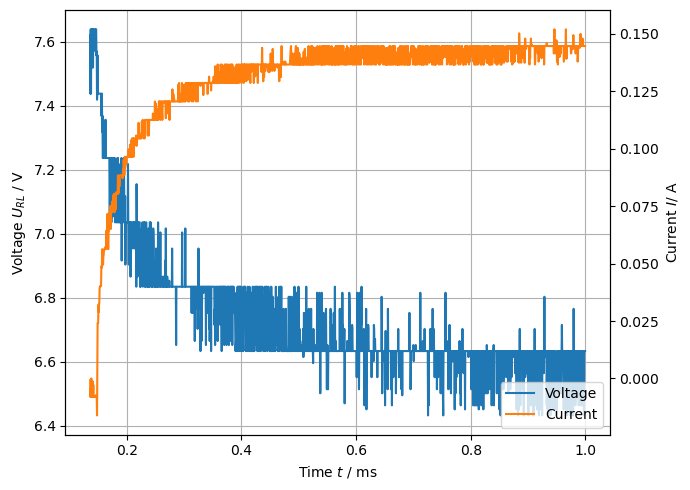

In [4]:
# Generate plot
ax1 = plt.figure(1, figsize=(7, 5)).subplots(1, 1)
ax1.plot(signal['time / ms'], signal['u_rl'], label='Voltage')
ax1.set_xlabel('Time $t$ / ms')
ax1.set_ylabel('Voltage $U_{RL}$ / V')
lh1, l1 = ax1.get_legend_handles_labels()
ax1.grid()
ax2 = ax1.twinx()
ax2.plot(signal['time / ms'], signal['i_l'], 'C1', label='Current')
ax2.set_ylabel('Current $I$/ A')
lh2, l2 = ax2.get_legend_handles_labels()
ax1.legend(lh1+lh2, l1+l2, loc='lower right')
plt.tight_layout()

In lecture "Electromagnetic Fields" the power-on behavior is described mathematically:

$i_L\left( t \right) = \frac{{{U_0}}}{R} \cdot \left( {1 - {e^{ - \frac{t-t_0}{T}}}} \right)\sigma(t-t_0)$

where the time constant $T$ is defined by 

$T = \frac{L}{R}$

With the known voltage $U_0$ and resistances $R_I$, $R_L$ and $R_S$ a current signal can be modelled estimating $L$. Modify variable $L$ until the power on behavior of measurement and simulation are similar.

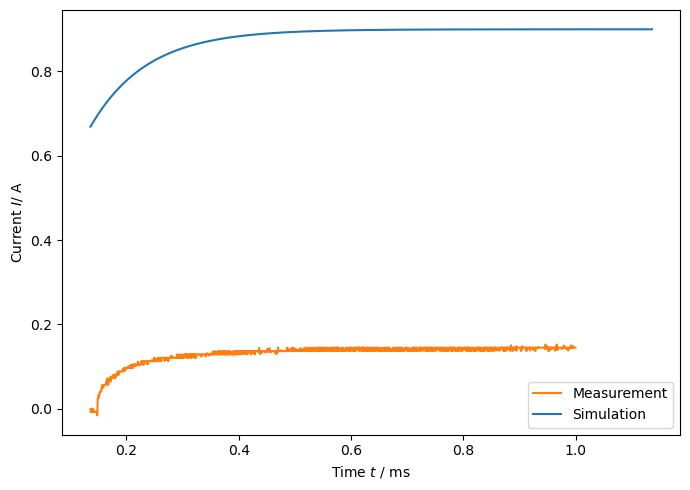

In [5]:
import numpy as np
# Define parameters 
U_0 = 9
R_I = 3
R_L = 2
L = 1e-3
r = R_S + R_L + R_I

# Determine time constant in ms
tau = L / r *1000 
t_0 = 0

# Simulate current 
signal['i_sim'] = U_0 / r * (1-np.exp(- (signal['time / ms']-t_0) / tau)) * (signal['time / ms'] >= t_0)

# Generate plot
ax1 = plt.figure(2, figsize=(7, 5)).subplots(1, 1)
ax1.plot(signal['time / ms'], signal['i_l'], 'C1', label='Measurement')
ax1.plot(signal['time / ms'], signal['i_sim'], 'C0', label='Simulation')
ax1.set_xlabel('Time $t$ / ms')
ax1.set_ylabel('Current $I$/ A')
ax1.legend()
plt.tight_layout()

With these identification steps the electrical parameters of your moving coil are defined.

| Parameter | Value    | Unit     |
|-----------|----------|----------|
| $R_L$     | 2.0013   | Ohms     |
| $L$       | 300.3    | µHenry   |
